In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use("../paper_plots/paper.mplstyle")

In [2]:
# Tex
plt.rcParams["text.usetex"] = True

In [7]:
# Loading timing data
timing_data = np.load("timings.npy")

In [8]:
energies = [1e2, 1e3, 1e4, 1e5]
event_count = 5
scaling = 1000 / 5

In [9]:
timing_data

array([nan, nan, nan, nan])

In [5]:
added_col = np.hstack((timing_data, np.reshape(timing_data[:, -2], (len(energies), 1))))
print(added_col)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
added_col[:, -3] = added_col[:, -3] * 0.1
plot_arr = np.zeros(added_col.shape)
plot_arr[:, 0] = added_col[:, 0]
plot_arr[:, 1] = added_col[:, 1]
plot_arr[:, 2] = added_col[:, -2]
plot_arr[:, 3] = added_col[:, -3]
plot_arr[:, 4] = added_col[:, -1]

In [ ]:
plot_arr

array([[2.05728109e+00, 6.02055788e-02, 9.90445614e-03, 1.06579719e+00,
        1.06579719e+01],
       [2.46827519e+00, 7.50523567e-02, 2.46726513e-02, 2.41827226e+00,
        2.41827226e+01],
       [2.74228835e+00, 7.24702120e-02, 2.84907055e-01, 6.27229149e+00,
        6.27229149e+01],
       [2.28867712e+00, 7.19572067e-02, 2.37313952e+00, 1.15485251e+01,
        1.15485251e+02]])

In [ ]:
def make_plot(timingdata, energies, ax=None):

    labels = [
        "Miscellaneous",
        "Injection",
        "Saving output",
        "Lepton propagation",
        "Photon propagation",
    ]

    if ax is None:
        _, ax = plt.subplots(figsize=(6,4))
    
    for x in range(len(labels)):
        label = labels[x]

        if x == 0:
            y1 = np.zeros(len(energies))
        else:
            y1 = np.sum(timingdata[:, :x], axis=1)
        y2 = np.sum(timingdata[:, :(x+1)], axis=1)
        ax.fill_between(energies, y1, y2, label=label)
    return ax

/tmp/ipykernel_256503/1209597086.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=100)


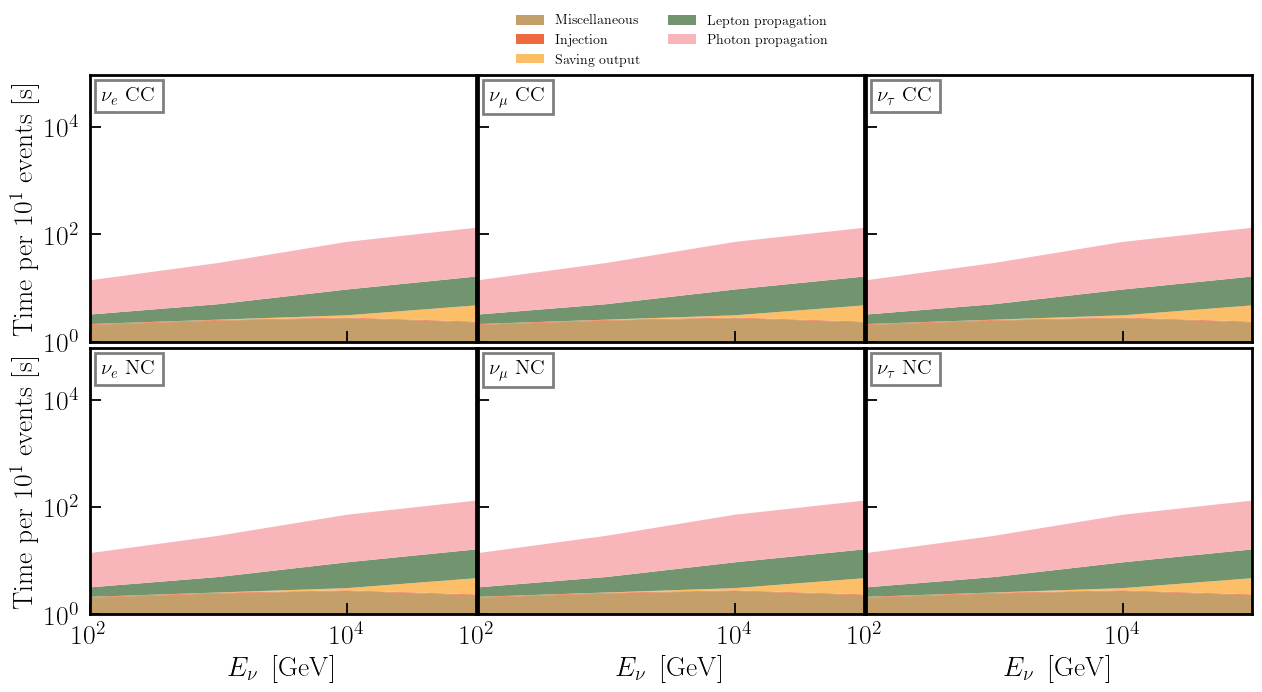

In [ ]:
fig = plt.figure(
    constrained_layout=True,
    figsize=(15, 7)
)

gs = GridSpec(2, 3, figure=fig, wspace=0.004, hspace=0.025)

timing_dirs = ["EMinus/", "MuMinus/", "TauMinus/", "NuE/", "NuE/", "NuE/"]
labels = [r'$\nu_{e}$ CC', r'$\nu_{\mu}$ CC', r'$\nu_{\tau}$ CC', r'$\nu_{e}$ NC', r'$\nu_{\mu}$ NC', r'$\nu_{\tau}$ NC']
for idx, (label, timing_dir) in enumerate(zip(labels, timing_dirs)):
    row = 0
    col = idx % 3
    if idx > 2:
        row = 1
    ax = fig.add_subplot(gs[row, col])
    ax = make_plot(plot_arr, energies, ax=ax)
    ax.loglog()
    ax.text(
        125,
        3e4,
        label,
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5}, fontsize=15
    )
    if col!=0:
        ax.set_yticklabels([])
    if row==0:
        ax.set_xticklabels([])
    ax.set_xlim(100, 1e5)
    ax.set_ylim(1, 9e4)
    if row==1:
        ax.set_xlabel(r"$E_{\nu}~\left[\rm{GeV}\right]$")
    if col==0:
        ax.set_ylabel(r"Time per $10^1$ events [s]")
    [i.set_linewidth(2) for i in ax.spines.values()]
plt.legend(loc=9, bbox_to_anchor=(-0.5, 2.3), ncol=2, frameon=False, fontsize=10)
plt.tight_layout(pad=100)
plt.savefig("prometheus_timing.pdf")
plt.show()